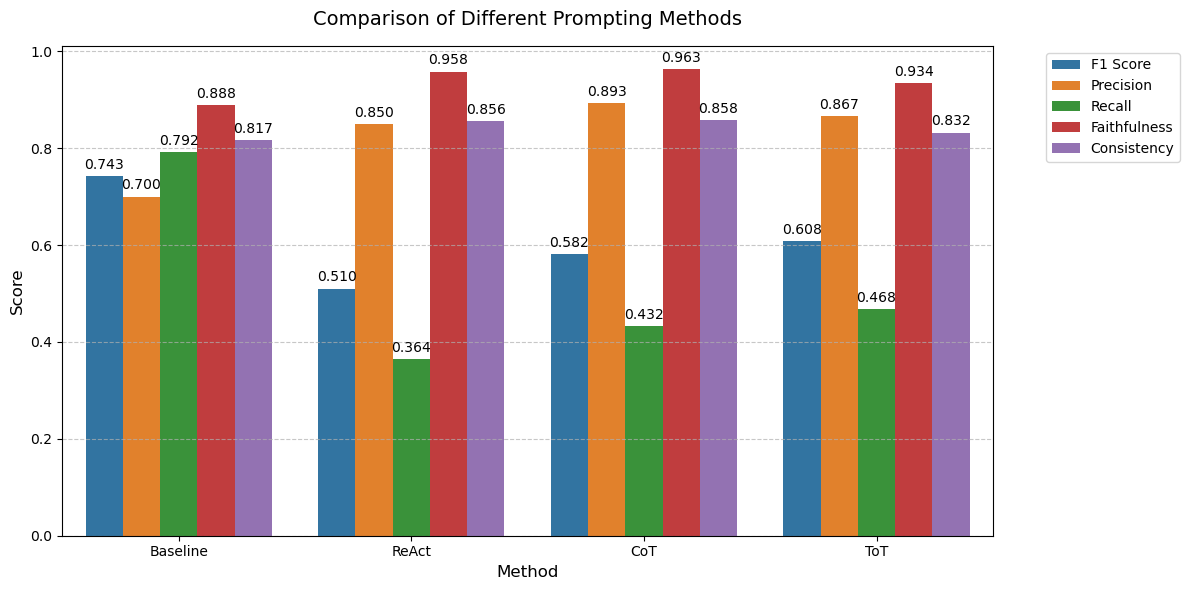

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create data dictionary
data = {
    'Method': ['Baseline', 'ReAct', 'CoT', 'ToT'],
    'F1 Score': [0.743, 0.510, 0.582, 0.608],
    'Precision': [0.700, 0.850, 0.893, 0.867],
    'Recall': [0.792, 0.364, 0.432, 0.468],
    'Faithfulness': [0.888, 0.958, 0.963, 0.934],
    'Consistency': [0.817, 0.856, 0.858, 0.832]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars=['Method'], 
                    value_vars=['F1 Score', 'Precision', 'Recall', 'Faithfulness', 'Consistency'],
                    var_name='Metric', value_name='Value')

# Set style

plt.figure(figsize=(12, 6))

# Create grouped bar plot
ax = sns.barplot(x='Method', y='Value', hue='Metric', data=df_melted)

# Customize the plot
plt.title('Comparison of Different Prompting Methods', fontsize=14, pad=15)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Add legend with better positioning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Optional: Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

# Show grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Optional: Save the plot
# plt.savefig('prompting_methods_comparison.png', dpi=300, bbox_inches='tight')

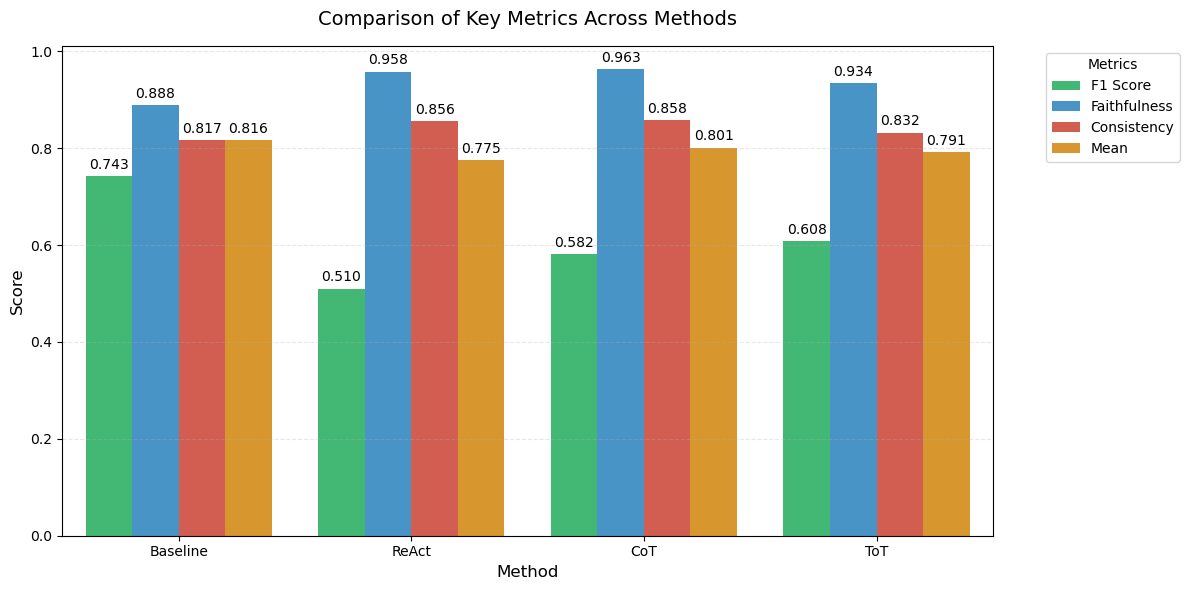


Mean Values for Each Method:
---------------------------
Baseline: 0.816
ReAct: 0.775
CoT: 0.801
ToT: 0.791


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create data dictionary
data = {
    'Method': ['Baseline', 'ReAct', 'CoT', 'ToT'],
    'F1 Score': [0.743, 0.510, 0.582, 0.608],
    'Faithfulness': [0.888, 0.958, 0.963, 0.934],
    'Consistency': [0.817, 0.856, 0.858, 0.832]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate mean for each method
df['Mean'] = df[['F1 Score', 'Faithfulness', 'Consistency']].mean(axis=1)

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars=['Method'], 
                    value_vars=['F1 Score', 'Faithfulness', 'Consistency', 'Mean'],
                    var_name='Metric', value_name='Value')

# Set style and color palette

colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
plt.figure(figsize=(12, 6))

# Create grouped bar plot
ax = sns.barplot(x='Method', y='Value', hue='Metric', data=df_melted, 
                palette=colors)

# Customize the plot
plt.title('Comparison of Key Metrics Across Methods', fontsize=14, pad=15)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

# Customize legend
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print mean values table
print("\nMean Values for Each Method:")
print("---------------------------")
for index, row in df.iterrows():
    print(f"{row['Method']}: {row['Mean']:.3f}")

C:\Users\manue\AppData\Local\Temp\ipykernel_57268\3013137225.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


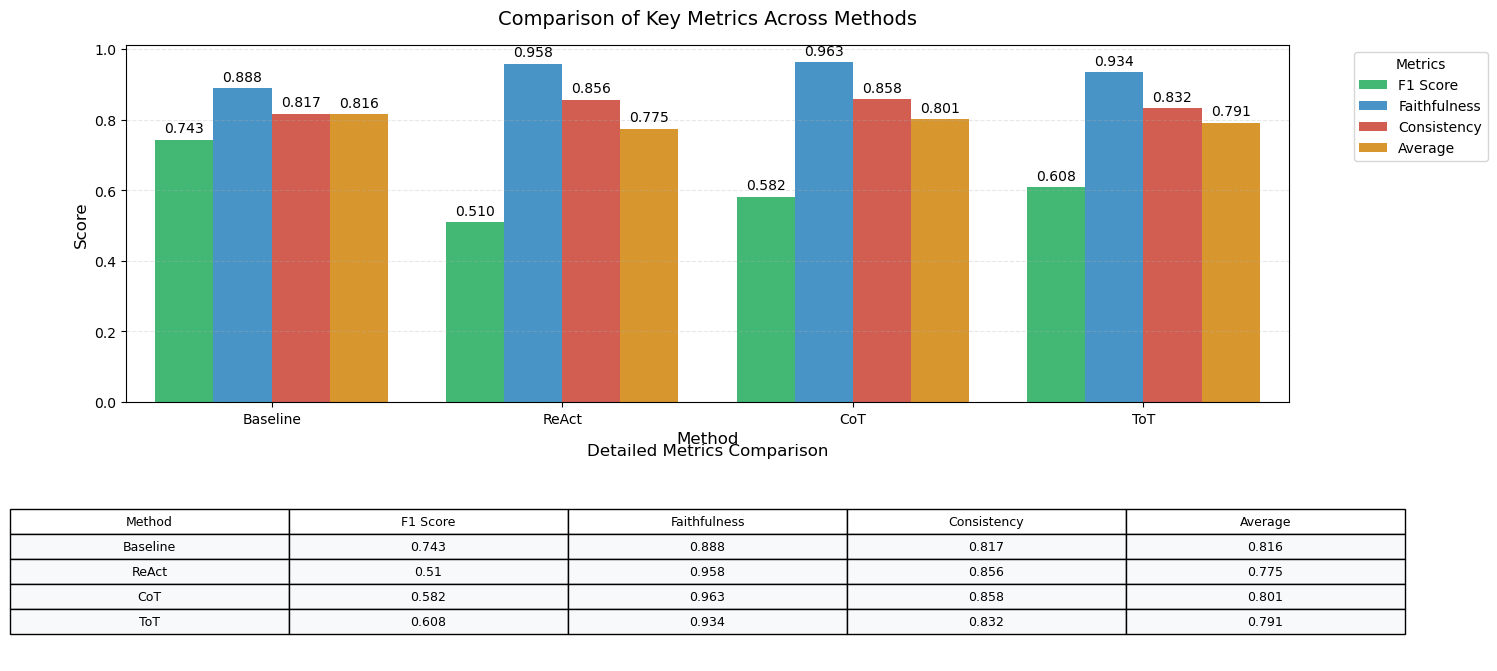


Detailed Metrics Table:
  Method  F1 Score  Faithfulness  Consistency  Average
Baseline     0.743         0.888        0.817    0.816
   ReAct     0.510         0.958        0.856    0.775
     CoT     0.582         0.963        0.858    0.801
     ToT     0.608         0.934        0.832    0.791


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create data dictionary
data = {
    'Method': ['Baseline', 'ReAct', 'CoT', 'ToT'],
    'F1 Score': [0.743, 0.510, 0.582, 0.608],
    'Faithfulness': [0.888, 0.958, 0.963, 0.934],
    'Consistency': [0.817, 0.856, 0.858, 0.832]
}

# Convert to DataFrame and calculate mean
df = pd.DataFrame(data)
df['Average'] = df[['F1 Score', 'Faithfulness', 'Consistency']].mean(axis=1)

# Create figure with subplots
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.3)

# Plot bar chart in the first subplot
ax1 = fig.add_subplot(gs[0])
df_melted = pd.melt(df, id_vars=['Method'], 
                    value_vars=['F1 Score', 'Faithfulness', 'Consistency', 'Average'],
                    var_name='Metric', value_name='Value')

colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
sns.barplot(x='Method', y='Value', hue='Metric', data=df_melted, 
            palette=colors, ax=ax1)

# Customize the bar plot
ax1.set_title('Comparison of Key Metrics Across Methods', fontsize=14, pad=15)
ax1.set_xlabel('Method', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)

# Add value labels on the bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', padding=3)

# Customize legend
ax1.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

# Create table in the second subplot
ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')

# Format the data for the table
table_data = df.round(3)
table = ax2.table(cellText=table_data.values, 
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center',
                 cellColours=[['#f8f9fa']*len(table_data.columns)]*len(table_data))

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Add table title
ax2.set_title('Detailed Metrics Comparison', pad=20)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Optional: Save the figure
# plt.savefig('metrics_comparison_with_table.png', dpi=300, bbox_inches='tight')

# Print formatted table
print("\nDetailed Metrics Table:")
print(df.round(3).to_string(index=False))